In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

/Users/shubhamtripathi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shubhamtripathi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/shubhamtripathi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/Users/shubhamtripathi/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [21]:
df = pd.read_csv('../../data/ltv_prediction_demo_data.csv.gz')

In [22]:
df.head()

,Unnamed: 0,idApp,dt,ltvDay1,ltvDay2,ltvDay3,ltvDay4,ltvDay5,ltvDay6,ltvDay7,ltvDay8,ltvDay30
0,0,279,2018-02-18,0,0,0,2190000,2190000,2190000,5780000,5780000,5780000
1,1,279,2018-04-20,0,0,0,0,0,0,0,0,0
2,2,5620,2017-09-28,0,0,0,0,0,0,0,0,0
3,3,279,2017-12-11,0,0,0,0,0,0,0,3652414,12123190
4,4,5620,2018-02-06,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000


In [25]:
df.columns

Index(['Unnamed: 0', 'idApp', 'dt', 'ltvDay1', 'ltvDay2', 'ltvDay3', 'ltvDay4',
       'ltvDay5', 'ltvDay6', 'ltvDay7', 'ltvDay8', 'ltvDay30'],
      dtype='object')

In [28]:
df['idApp'].value_counts().head()

5620    1077387
279      532735
5619     484202
278      282209
313      221160
Name: idApp, dtype: int64

In [29]:
df.shape

(3324150, 12)

In [33]:
ftrs = ['ltvDay' + str(i) for i in range(1,9)]

In [34]:
ftrs

['ltvDay1',
 'ltvDay2',
 'ltvDay3',
 'ltvDay4',
 'ltvDay5',
 'ltvDay6',
 'ltvDay7',
 'ltvDay8']

In [42]:
Xtrn = df.loc[df['idApp'] == 5620, ftrs + ['dt']]

In [43]:
Xtrn.head()

,ltvDay1,ltvDay2,ltvDay3,ltvDay4,ltvDay5,ltvDay6,ltvDay7,ltvDay8,dt
2,0,0,0,0,0,0,0,0,2017-09-28
4,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,2018-02-06
8,1490000,1490000,1490000,1490000,1490000,1490000,1490000,1490000,2018-02-08
9,0,1490000,1490000,1490000,1490000,1490000,1490000,1490000,2017-12-30
12,0,0,0,0,0,0,0,0,2018-02-25


In [44]:
Xtrn.shape

(1077387, 9)

In [45]:
ytrn = df.loc[df['idApp']==5620, 'ltvDay30']

In [46]:
ytrn.head()

2           0
4     1490000
8     1490000
9     1490000
12    4470000
Name: ltvDay30, dtype: int64

In [47]:
Xtrn['dt'].min(), Xtrn['dt'].max()

('2017-07-05', '2018-06-18')

### Split data: 
- Train: July,2017 TO Nov,2017
- Valid: Jan,2018  TO May,2018
- Test:  June,2018 Target

In [49]:
Xtrn1 = Xtrn.loc[Xtrn['dt'] <= '2017-12-01', ftrs]
Xvld  = Xtrn.loc[Xtrn['dt'] >= '2018-01-01', ftrs]
ytrn1 = ytrn.loc[Xtrn['dt'] <= '2017-12-01']
yvld  = ytrn.loc[Xtrn['dt'] >= '2018-01-01']

In [54]:
Xtrn1.shape, Xvld.shape

((464504, 8), (482918, 8))

In [55]:
from sklearn.linear_model import Ridge

In [60]:
rdg = Ridge(random_state=17)
rdg.fit(Xtrn1,ytrn1)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=17, solver='auto', tol=0.001)

In [63]:
yprd = rdg.predict(Xvld)

In [66]:
err = yprd.sum() / yvld.sum()


# Logistic Regression Example Boston Dataset

In [2]:
boston = load_boston()
X, y = boston['data'], boston['target']

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

In [6]:
# lasso regression performs feature selection
lasso = Lasso(alpha=10)
lasso.fit(X,y)
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

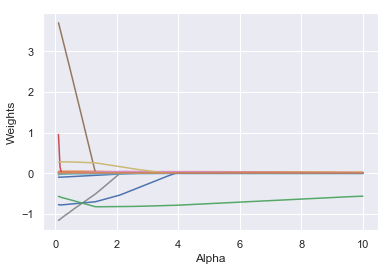

In [12]:
nAlpha = 200
alphas = np.linspace(0.1, 10, nAlpha)
model = Lasso()
coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.show();

In [14]:
np.shape(coefs)

(200, 13)

**Lasso cross-validation**

In [18]:
# tuning hyperparameters using optimization procedure is described in Elements of Statistical Learning
lassoCV = LassoCV(alphas=alphas, cv=3, random_state=17)
lassoCV.fit(X, y)

LassoCV(alphas=array([ 0.1    ,  0.14975, ...,  9.95025, 10.     ]),
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
    verbose=False)

In [19]:
lassoCV.coef_

array([-0.09739888,  0.04946381, -0.02749478,  0.16060406, -0.        ,
        3.55971374, -0.00726968, -1.13393157,  0.28096773, -0.01503453,
       -0.77985441,  0.01025033, -0.58259584])

In [20]:
lassoCV.alpha_

0.14974874371859298